<a href="https://colab.research.google.com/github/yasminbottan/regressao/blob/main/Conceito_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESS√ÉO LINEAR**

## **O que √©?**

 √â uma t√©cnica estat√≠stica usada para entender a rela√ß√£o entre vari√°veis num√©ricas. Tem como objetivo prever o valor de uma vari√°vel resposta  considerando as outras vari√°veis dispon√≠veis na base de dados.

# **Exemplo: Marcas de Chocolate**

Temos uma base com as vendas e gastos com publicidade das principais marcas de chocolate do Brasil.


In [ ]:
import pandas as pd

df_marcas = pd.DataFrame(
    {
        'marca': ['Kopenhagem','Lindit','Cacau Show','Milka','Nestle','Lacta','Garoto'],
        'gasto_publicidade': [131.3,92.4,60.4,55.7,40.2,29.0,11.6],
        'vendas': [1929.2,1384.6,811.4,541.5,536.9,535.6,219.5]
    }
)

df_marcas

marca  gasto_publicidade  vendas
0  Kopenhagem              131.3  1929.2
1      Lindit               92.4  1384.6
2  Cacau Show               60.4   811.4
3       Milka               55.7   541.5
4      Nestle               40.2   536.9
5       Lacta               29.0   535.6
6      Garoto               11.6   219.5

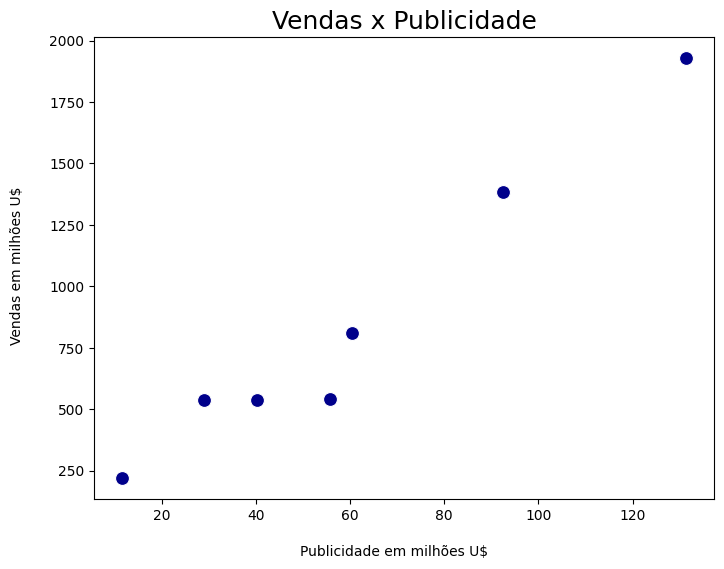

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(8,6))
sns.scatterplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas, color='DarkBlue', s=100);

axes.set_title('Vendas x Publicidade', fontsize=18)
axes.set_xlabel('')
axes.set_ylabel('')

fig.supxlabel('Publicidade em milh√µes U$', fontsize=10)
fig.supylabel('Vendas em milh√µes U$', fontsize=10);

No gr√°fico, √© poss√≠vel observar a rela√ß√£o entre vendas e o gasto com publicidade de cada marca de chocolate. A regress√£o linear identifica a linha reta que melhor se ajusta aos pontos, minimizando a dist√¢ncia entre a linha e os pontos de dados (o erro).

* Linha: previs√£o (linha de regress√£o, que representa a rela√ß√£o entre as vari√°veis).
* Dist√¢ncia: erro (a dist√¢ncia entre a linha de regress√£o e os pontos de dados).

# **Modelo de Regress√£o Linear Simples**

Para encontrarmos a nossa **Regress√£o Linear** ser√° necess√°rio:



1.   Escolher x (vari√°vel independente) e y (vari√°vel resposta)
2.   Identificar o Intercepto
3.   Identificar o Coeficiente
4.   Identificar a predi√ß√£o de y (y_pred)





In [ ]:
# 1.   Escolher x (vari√°vel independente) e y (vari√°vel resposta)

X = df_marcas.filter(['gasto_publicidade']).copy()
y = df_marcas['vendas'].copy()

Aqui, X √© a vari√°vel independente (gasto com publicidade), e y √© a vari√°vel dependente (vendas). O modelo tentar√° prever y com base em X.

In [ ]:
# 2.   Identificar o Intercepto

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

lr.intercept_

-15.420436321709303

O intercepto √© o valor de y quando x = 0. Ou seja, a previs√£o de vendas quando n√£o h√° nenhum gasto com publicidade ser√° de U$ 15,42.

In [ ]:
# 3.   Identificar o Coeficiente

lr.coef_

array([14.42378282])

O coeficiente indica quanto a vari√°vel y (vendas) muda quando h√° um aumento unit√°rio em x (gasto com publicidade).
Ou seja, a cada US 1 gasto com publicidade, aumentar√° em U$ 14,42 as vendas.

In [ ]:
# 4.   Identificar a predi√ß√£o de y (y_pred)

y_pred = lr.predict(X)
y_pred

array([1878.42224799, 1317.33709628,  855.77604603,  787.98426677,
        564.41563306,  402.86926547,  151.89544439])

y_pred s√£o os valores preditos de y (vendas) com base no modelo de regress√£o linear. O modelo gera uma previs√£o de vendas para cada valor de gasto com publicidade.

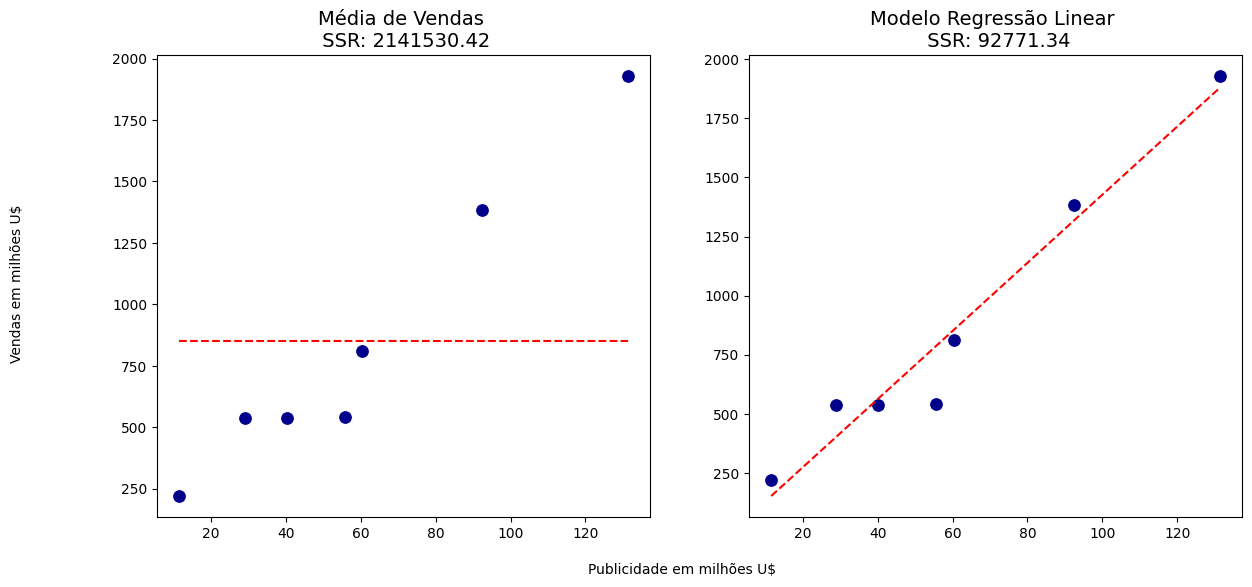

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(14, 6))

sns.scatterplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas, ax=axes[0], color='DarkBlue', s=100);
sns.lineplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas.mean(), ax=axes[0], linestyle='--', color='red')

ssr_avg = sum((df_marcas.vendas.mean() - y) ** 2)
axes[0].set_title(f'M√©dia de Vendas \n SSR: {ssr_avg:.2f}', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('')


sns.scatterplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas, ax=axes[1], color='DarkBlue', s=100);
sns.lineplot(x=df_marcas.gasto_publicidade, y=y_pred, ax=axes[1], linestyle='--', color='red')

ssr_model = sum((y - y_pred) ** 2)
axes[1].set_title(f'Modelo Regress√£o Linear \n SSR: {ssr_model:.2f}', fontsize=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('')


fig.supxlabel('Publicidade em milh√µes U$', fontsize=10)
fig.supylabel('Vendas em milh√µes U$', fontsize=10);

O gr√°fico (1) mostra a rela√ß√£o entre gasto com publicidade e vendas de cada marca com o destaque da linha em vermelho indicando a m√©dia das vendas sem considerar a previs√£o. O SSR de 2.141.530,42 mostra a distor√ß√£o entre o modelo de m√©dia e os dados reais.

O gr√°fico (2) novamente mostra a rela√ß√£o entre gasto com publicidade e vendas mas dessa vez o destaque da linha em vermelho apresenta modelo ajustado de vendas, com base na regress√£o linear. A redu√ß√£o desse erro SSR para 92.771,34 indica que o modelo de regress√£o √© mais preciso do que o modelo baseado na m√©dia.

**CONCEITO IMPORTANTE**

SSR ou Sum of Square Residuals tamb√©m conhecido como Soma dos Quadrados dos Res√≠duos, √© uma medida estat√≠stica que quantifica o erro de um modelo de regress√£o.

Em termos simples, o SSR mede o qu√£o bem o modelo se ajusta aos dados, indicando a quantidade de erro que o modelo comete. Portanto, quanto menor, mais bem ajustado ser√° o modelo de Regress√£o Linear.

# **Aplicando Modelo**

Para aplicarmos o Modelo de Regress√£o Linear Simples contru√≠do anteriormente precisamos:

1.  Criar novo banco de dados
2.  Predi√ß√£o de vendas utilizando modelo
3.  Criar fun√ß√£o de previs√£o
4.  Chamar fun√ß√£o para prever as vendas
5.  C√°lculo do Coeficiente (R2)

In [ ]:
# 1.  Criar novo banco de dados

df_marcas_prod = pd.DataFrame(
    {
        'marca': ['Cacau Show SP', 'Cacau Show RJ'],
        'gasto_publicidade': [20, 30],
    }
)

df_marcas_prod

marca  gasto_publicidade
0  Cacau Show SP                 20
1  Cacau Show RJ                 30

Com esses dados podemos fazer previs√µes de vendas com base nos valores de gasto com publicidade.

In [ ]:
# 2.  Predi√ß√£o de vendas utilizando modelo

print(lr.predict(df_marcas_prod[['gasto_publicidade']]))

[273.05522009 417.29304829]


O predict recebe como entrada o banco de dados criado com a coluna 'gasto_publicidade' e retorna as vendas preditas para esses valores de publicidade.

In [ ]:
# 3.  Criar fun√ß√£o de previs√£o

def func_total_vendas(b0, b1, x1):
    return round(b0 + (b1 * x1), 4)

Esta fun√ß√£o recebe tr√™s par√¢metros:

* b0 (intercepto da regress√£o linear)
* b1 (coeficiente da regress√£o linear, relacionado ao impacto do gasto com publicidade nas vendas)
* x1 (valor de gasto com publicidade para o qual queremos prever as vendas).

A fun√ß√£o calcula a previs√£o de vendas usando a f√≥rmula da equa√ß√£o da reta da regress√£o linear:

ùë¶
=
ùëè
0
+
(
ùëè
1
√ó
ùë•
1
)

In [ ]:
# 4.  Chamar fun√ß√£o para prever as vendas

func_total_vendas(
    b0=lr.intercept_,
    b1=lr.coef_[0],
    x1=20
)

273.0552

A fun√ß√£o func_total_vendas √© chamada passando o intercepto (lr.intercept_), o coeficiente (lr.coef_[0]), e o valor de gasto com publicidade (x1=20 milh√µes de d√≥lares) para a marca Guarana Light. Isso retorna a previs√£o de vendas para esse valor de gasto com publicidade.

In [ ]:
# 5.  C√°lculo do Coeficiente (R2)

from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.9566798871073536

y representa os valores reais de vendas e y_pred s√£o as previs√µes feitas pelo modelo de regress√£o linear. A fun√ß√£o r2_score compara os dois e calcula o valor de R¬≤, que indica a qualidade do modelo de regress√£o √© de 0,9567, ou seja √© excelente.

**CONCEITO IMPORTANTE**

O r2_score √© uma m√©trica que calcula o coeficiente de determina√ß√£o (R¬≤). Essa m√©trica mostra o qu√£o bem o modelo de regress√£o linear se ajusta aos dados. O valor de R¬≤ varia entre 0 e 1:

* 0 significa que o modelo n√£o explica nenhuma variabilidade dos dados.
* 1 significa que o modelo explica toda a variabilidade dos dados.